# Задание 1.1 - Метод К-ближайших соседей (K-neariest neighbor classifier)

В первом задании вы реализуете один из простейших алгоритмов машинного обучения - классификатор на основе метода K-ближайших соседей.
Мы применим его к задачам
- бинарной классификации (то есть, только двум классам)
- многоклассовой классификации (то есть, нескольким классам)

Так как методу необходим гиперпараметр (hyperparameter) - количество соседей, мы выберем его на основе кросс-валидации (cross-validation).

Наша основная задача - научиться пользоваться numpy и представлять вычисления в векторном виде, а также ознакомиться с основными метриками, важными для задачи классификации.

Перед выполнением задания:
- запустите файл `download_data.sh`, чтобы скачать данные, которые мы будем использовать для тренировки
- установите все необходимые библиотеки, запустив `pip install -r requirements.txt` (если раньше не работали с `pip`, вам сюда - https://pip.pypa.io/en/stable/quickstart/)

Если вы раньше не работали с numpy, вам может помочь tutorial. Например этот:  
http://cs231n.github.io/python-numpy-tutorial/

#### Напишем инструкции, что мы выполнили в оболочке Linux

cd dlcourse_ai
virtualenv .venv
.venv/bin/pip install matplotlib juputer notebook tornado\<6 scipy
.venv/bin/jupyternotebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

%load_ext autoreload
%autoreload 2

In [2]:
from dataset import load_svhn
from knn import KNN
from metrics import binary_classification_metrics, multiclass_accuracy, multiclass_confusion_matrix

# Загрузим и визуализируем данные

В задании уже дана функция `load_svhn`, загружающая данные с диска. Она возвращает данные для тренировки и для тестирования как numpy arrays.

Мы будем использовать цифры из датасета Street View House Numbers (SVHN, http://ufldl.stanford.edu/housenumbers/), чтобы решать задачу хоть сколько-нибудь сложнее MNIST.

In [3]:
train_X, train_y, test_X, test_y = load_svhn("data", max_train=1000, max_test=100)

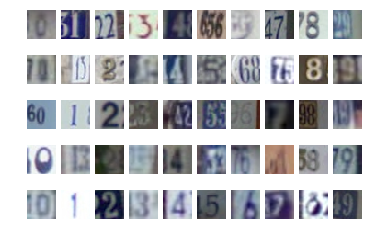

In [4]:
samples_per_class = 5  # Number of samples per class to visualize
plot_index = 1
for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(5, 10, plot_index)
        image = train_X[train_y == class_index][example_index]
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1
    obj = train_X[train_y == 0][example_index]
    #print(obj)
    #print()
    #print(obj.shape)

# Сначала реализуем KNN для бинарной классификации

В качестве задачи бинарной классификации мы натренируем модель, которая будет отличать цифру 0 от цифры 9.

In [5]:
# First, let's prepare the labels and the source data

# Only select 0s and 9s
binary_train_mask = (train_y == 0) | (train_y == 9)
binary_train_X = train_X[binary_train_mask]
binary_train_y = train_y[binary_train_mask] == 0

#сравнение с нулем строчкой выше нужно, чтобы int->bool

binary_test_mask = (test_y == 0) | (test_y == 9)
binary_test_X = test_X[binary_test_mask]
binary_test_y = test_y[binary_test_mask] == 0

# Reshape to 1-dimensional array [num_samples, 3*3*32]
binary_train_X = binary_train_X.reshape(binary_train_X.shape[0], -1)
binary_test_X = binary_test_X.reshape(binary_test_X.shape[0], -1)

In [6]:
print(binary_train_X.shape)
print(binary_test_X.shape)

(136, 3072)
(12, 3072)


In [7]:
# Create the classifier and call fit to train the model
# KNN just remembers all the data
knn_classifier = KNN(k=2)
knn_classifier.fit(binary_train_X, binary_train_y)

## Пришло время написать код! 

Последовательно реализуйте функции `compute_distances_two_loops`, `compute_distances_one_loop` и `compute_distances_no_loops`
в файле `knn.py`

In [8]:
# TODO: implement compute_distances_two_loops in knn.py
dists = knn_classifier.compute_distances_two_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [9]:
# TODO: implement compute_distances_one_loop in knn.py
dists = knn_classifier.compute_distances_one_loop(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))


In [10]:
# TODO: implement compute_distances_no_loops in knn.py
dists = knn_classifier.compute_distances_no_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))


In [11]:
# Lets look at the performance difference
#%timeit knn_classifier.compute_distances_two_loops(binary_test_X)
#%timeit knn_classifier.compute_distances_one_loop(binary_test_X)
#%timeit knn_classifier.compute_distances_no_loops(binary_test_X)

In [12]:
# TODO: implement predict_labels_binary in knn.py
import pdb
prediction = knn_classifier.predict(binary_test_X)
prediction

array([False,  True,  True,  True,  True, False, False,  True, False,
       False, False, False])

In [13]:
binary_test_y

array([ True,  True, False, False,  True,  True, False,  True, False,
       False,  True, False])

In [14]:
# TODO: implement binary_classification_metrics in metrics.py
accuracy, precision, recall, f1 = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 2
Accuracy: 0.60, Precision: 0.50, Recall: 0.55, F1: 0.58


In [15]:
# Let's put everything together and run KNN with k=3 and see how we do
knn_classifier_3 = KNN(k=3)
knn_classifier_3.fit(binary_train_X, binary_train_y)
prediction = knn_classifier_3.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier_3.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

KNN with k = 3
Accuracy: 0.75, Precision: 0.71, Recall: 0.83, F1: 0.77


In [16]:
# Let's put everything together and run KNN with k=3 and see how we do
for i in range(1,20):
    knn_classifier_3 = KNN(k=i)
    knn_classifier_3.fit(binary_train_X, binary_train_y)
    prediction = knn_classifier_3.predict(binary_test_X)

    precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
    print("KNN with k = %s" % knn_classifier_3.k)
    print("i: %s, Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (i,accuracy, precision, recall, f1)) 

KNN with k = 1
i: 1, Accuracy: 0.58, Precision: 0.57, Recall: 0.67, F1: 0.62
KNN with k = 2
i: 2, Accuracy: 0.58, Precision: 0.60, Recall: 0.50, F1: 0.55
KNN with k = 3
i: 3, Accuracy: 0.75, Precision: 0.71, Recall: 0.83, F1: 0.77
KNN with k = 4
i: 4, Accuracy: 0.75, Precision: 0.80, Recall: 0.67, F1: 0.73
KNN with k = 5
i: 5, Accuracy: 0.75, Precision: 0.71, Recall: 0.83, F1: 0.77
KNN with k = 6
i: 6, Accuracy: 0.58, Precision: 0.60, Recall: 0.50, F1: 0.55
KNN with k = 7
i: 7, Accuracy: 0.67, Precision: 0.62, Recall: 0.83, F1: 0.71
KNN with k = 8
i: 8, Accuracy: 0.58, Precision: 0.57, Recall: 0.67, F1: 0.62
KNN with k = 9
i: 9, Accuracy: 0.58, Precision: 0.57, Recall: 0.67, F1: 0.62
KNN with k = 10
i: 10, Accuracy: 0.58, Precision: 0.57, Recall: 0.67, F1: 0.62
KNN with k = 11
i: 11, Accuracy: 0.67, Precision: 0.62, Recall: 0.83, F1: 0.71
KNN with k = 12
i: 12, Accuracy: 0.58, Precision: 0.57, Recall: 0.67, F1: 0.62
KNN with k = 13
i: 13, Accuracy: 0.58, Precision: 0.57, Recall: 0.67, 

# Кросс-валидация (cross-validation)

Попробуем найти лучшее значение k! 

Для этого мы воспользуемся k-fold cross-validation (https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation). Мы разделим тренировочные данные на 5 фолдов (folds), и по очереди будем использовать каждый из них в качестве проверочных данных (validation data), а остальные -- в качестве тренировочных (training data).

В качестве финальной оценки эффективности k мы усредним значения F1 score на всех фолдах.
После этого мы просто выберем значение k с лучшим значением метрики.

*Бонус*: есть ли другие варианты агрегировать F1 score по всем фолдам? Напишите плюсы и минусы в клетке ниже.

In [17]:
# Find the best k using cross-validation based on F1 score
num_folds = 5
# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y
train_folds_X = np.array_split(binary_train_X,num_folds)
train_folds_y = np.array_split(binary_train_y,num_folds)

#a = np.array(binary_train_X)
#print(a.shape)

#k_choices = [5]
k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50, 75]
k_to_f1 = {}  # dict mapping k values to mean F1 scores (int -> float)

for k_ind in k_choices:
    # TODO: perform cross-validation
    # Go through every fold and use it for testing and all other folds for training
    f1_avg = []
    print("KNN with k = %s" % k_ind)
    for i in range(num_folds):
        # создадим валидационный датасет (1/4)
        val_X = train_folds_X[i]
        val_y = train_folds_y[i]
        # создадим тренировочный датасет (3/4)
        train_cross_X = np.zeros(shape=(0,binary_train_X.shape[1])) #  создали пустой двумерный массив (0,3072)
        train_cross_y = np.zeros(shape=(0), dtype=bool) #  создали пустой двумерный массив (0,1)
        for idx in range(num_folds):
            if idx != i:
                train_cross_X = np.concatenate((train_cross_X,train_folds_X[idx]))
                train_cross_y = np.concatenate((train_cross_y,train_folds_y[idx]))
        
        # тренируем классификатор
        knn_classifier_3 = KNN(k=k_ind)
        knn_classifier_3.fit(train_cross_X, train_cross_y)
        prediction = knn_classifier_3.predict(val_X)
        precision, recall, f1, accuracy = binary_classification_metrics(prediction, val_y)
        f1_avg.append(f1)
        print("i: %s, Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (i,accuracy, precision, recall, f1)) 
    print("Average: ", sum(f1_avg)/len(f1_avg))
    k_to_f1[k_ind] = sum(f1_avg)/len(f1_avg)
    print("------------")
        
    # Perform training and produce F1 score metric on the validation dataset
    # Average F1 from all the folds and write it into k_to_f1

    pass

for k in sorted(k_to_f1):
    print('k = %d, f1 = %f' % (k, k_to_f1[k]))

KNN with k = 1
i: 0, Accuracy: 0.54, Precision: 0.47, Recall: 0.67, F1: 0.55
i: 1, Accuracy: 0.48, Precision: 0.50, Recall: 0.43, F1: 0.46
i: 2, Accuracy: 0.63, Precision: 0.65, Recall: 0.73, F1: 0.69
i: 3, Accuracy: 0.44, Precision: 0.41, Recall: 0.58, F1: 0.48
i: 4, Accuracy: 0.70, Precision: 0.81, Recall: 0.72, F1: 0.76
Average:  0.5896454205024184
------------
KNN with k = 2
i: 0, Accuracy: 0.61, Precision: 0.60, Recall: 0.25, F1: 0.35
i: 1, Accuracy: 0.63, Precision: 0.83, Recall: 0.36, F1: 0.50
i: 2, Accuracy: 0.56, Precision: 0.67, Recall: 0.40, F1: 0.50
i: 3, Accuracy: 0.59, Precision: 0.55, Recall: 0.50, F1: 0.52
i: 4, Accuracy: 0.56, Precision: 0.75, Recall: 0.50, F1: 0.60
Average:  0.4949360613810742
------------
KNN with k = 3
i: 0, Accuracy: 0.61, Precision: 0.53, Recall: 0.75, F1: 0.62
i: 1, Accuracy: 0.52, Precision: 0.54, Recall: 0.50, F1: 0.52
i: 2, Accuracy: 0.70, Precision: 0.71, Recall: 0.80, F1: 0.75
i: 3, Accuracy: 0.56, Precision: 0.50, Recall: 0.67, F1: 0.57
i: 

### Проверим, как хорошо работает лучшее значение k на тестовых данных (test data)

In [18]:
# TODO Set the best k to the best value found by cross-validation
best_k =25

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(binary_train_X, binary_train_y)
prediction = best_knn_classifier.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("Best KNN with k = %s" % best_k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

Best KNN with k = 25
Accuracy: 0.75, Precision: 0.71, Recall: 0.83, F1: 0.77


# Многоклассовая классификация (multi-class classification)

Переходим к следующему этапу - классификации на каждую цифру.

In [19]:
# Now let's use all 10 classes
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

knn_classifier = KNN(k=1)
knn_classifier.fit(train_X, train_y)

In [21]:
# TODO: Implement predict_labels_multiclass
predict = knn_classifier.predict(test_X, num_loops = 1)

In [22]:
print(predict)
print(test_y)

[4 2 3 7 2 6 3 1 5 2 9 0 6 9 9 8 1 1 6 2 0 4 1 5 1 9 2 1 1 1 8 1 4 4 2 7 2
 7 7 0 1 1 7 1 1 1 7 2 3 7 1 5 2 9 2 1 2 2 7 0 2 1 1 7 2 4 3 0 6 1 6 2 7 1
 8 2 7 7 1 4 2 7 5 3 6 9 7 2 8 1 1 6 2 2 4 9 1 7 4 0]
[2 1 3 6 2 5 6 4 8 1 4 8 6 0 3 7 7 2 2 2 1 7 2 1 2 3 2 1 2 7 5 1 1 0 2 9 2
 6 9 1 7 1 2 2 0 5 3 2 5 8 4 6 3 2 2 2 4 7 4 5 7 4 1 0 1 4 9 0 5 9 6 5 1 2
 8 1 5 2 2 1 3 2 5 2 9 3 3 6 5 2 0 2 8 5 4 9 7 5 4 7]


In [23]:
# TODO: Implement multiclass_accuracy
accuracy = multiclass_accuracy(predict, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.21


In [24]:
matrix = multiclass_confusion_matrix(predict, test_y)
print(matrix)

[[1 2 0 0 0 1 0 1 1 0]
 [2 4 9 0 3 1 0 4 0 1]
 [0 4 7 2 1 2 1 2 1 0]
 [0 0 1 1 0 1 1 0 0 1]
 [1 2 1 0 3 0 0 1 0 0]
 [0 1 0 0 0 1 1 0 1 0]
 [0 0 2 0 0 2 2 0 0 1]
 [1 1 3 2 1 2 2 0 1 2]
 [0 0 0 0 0 2 0 1 1 0]
 [1 0 1 3 1 0 0 0 0 1]]


Снова кросс-валидация. Теперь нашей основной метрикой стала точность (accuracy), и ее мы тоже будем усреднять по всем фолдам.

In [25]:
# Find the best k using cross-validation based on accuracy
def folds_maker(data_to_fold, num_folds=5):
    return np.array([np.array(data_to_fold[i::num_folds]) for i in range(num_folds)])

num_folds = 5
train_folds_X = folds_maker(train_X, num_folds = num_folds)
train_folds_y = folds_maker(train_y, num_folds = num_folds)

# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y
k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_accuracy = {}

for k in k_choices:
    # TODO: perform cross-validation
    # Go through every fold and use it for testing and all other folds for validation
    # Perform training and produce accuracy metric on the validation dataset
    # Average accuracy from all the folds and write it into k_to_accuracy
    accuracy_avg = []
    print("KNN with k = %s" % k)
    for idx in range(num_folds):
        # создадим валидационный датасет
        val_X = train_folds_X[idx]
        val_y = train_folds_y[idx]
        # создадим тренировочный датасет
        train_cross_X = np.concatenate(np.array([train_folds_X[i] for i in range(num_folds) if i!=idx])) # склеили вдоль первой оси
        train_cross_y = np.concatenate(np.array([train_folds_y[i] for i in range(num_folds) if i!=idx]))
        # тренируем сетку
        knn_classifier = KNN(k=k)
        knn_classifier.fit(train_cross_X, train_cross_y)
        predict = knn_classifier.predict(val_X,num_loops = 1)
        accuracy = multiclass_accuracy(predict, val_y)
        accuracy_avg.append(accuracy)
        print("Accuracy: %4.2f" % accuracy)
    k_to_accuracy[k] = sum(accuracy_avg)/len(accuracy_avg)
    print("------------------")
        
for k in sorted(k_to_accuracy):
    print('k = %d, accuracy = %f' % (k, k_to_accuracy[k]))

KNN with k = 1
Accuracy: 0.26
Accuracy: 0.29
Accuracy: 0.23
Accuracy: 0.28
Accuracy: 0.17
------------------
KNN with k = 2
Accuracy: 0.23
Accuracy: 0.27
Accuracy: 0.20
Accuracy: 0.25
Accuracy: 0.20
------------------
KNN with k = 3
Accuracy: 0.27
Accuracy: 0.24
Accuracy: 0.17
Accuracy: 0.24
Accuracy: 0.15
------------------
KNN with k = 5
Accuracy: 0.20
Accuracy: 0.23
Accuracy: 0.20
Accuracy: 0.26
Accuracy: 0.17
------------------
KNN with k = 8
Accuracy: 0.24
Accuracy: 0.23
Accuracy: 0.23
Accuracy: 0.29
Accuracy: 0.23
------------------
KNN with k = 10
Accuracy: 0.23
Accuracy: 0.23
Accuracy: 0.23
Accuracy: 0.29
Accuracy: 0.26
------------------
KNN with k = 15
Accuracy: 0.23
Accuracy: 0.23
Accuracy: 0.26
Accuracy: 0.26
Accuracy: 0.21
------------------
KNN with k = 20
Accuracy: 0.23
Accuracy: 0.24
Accuracy: 0.26
Accuracy: 0.27
Accuracy: 0.19
------------------
KNN with k = 25
Accuracy: 0.26
Accuracy: 0.23
Accuracy: 0.23
Accuracy: 0.24
Accuracy: 0.20
------------------
KNN with k = 50

### Финальный тест - классификация на 10 классов на тестовой выборке (test data)

Если все реализовано правильно, вы должны увидеть точность не менее **0.2**.

In [27]:
# TODO Set the best k as a best from computed
best_k = 10

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(train_X, train_y)
prediction = best_knn_classifier.predict(test_X, num_loops = 1)

# Accuracy should be around 20%!
accuracy = multiclass_accuracy(prediction, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.25
